In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [23]:
img_dir_path = './train/eval/images/'

In [24]:
df = pd.read_csv('submit_2.csv')
df.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12


In [359]:
def check_stat(num):
    mask_stat = ['wear', 'incorrect', 'not_wear']
    gender_stat = ['male', 'female']
    age_stat = ['~30', '30~60', '60~']
    mask, gender, age = 0, 0, 0
    mask = mask_stat[num//6]
    num %= 6
    gender = gender_stat[num//3]
    num %= 3
    age = age_stat[num]
    return f'{mask} / {gender} / {age}'

7
incorrect / male / 30~60


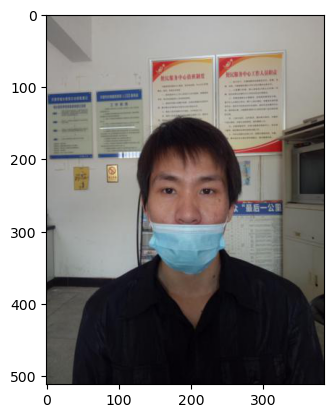

In [393]:
idx = random.randint(0, len(df)-1)
stat = df['ans'][idx]
img_name = df['ImageID'][idx]
img = plt.imread(img_dir_path + img_name)
print(stat)
print(check_stat(stat))
plt.imshow(img)

In [413]:
mask = 0    # wear : 0  //  incorrect : 1  //  correct : 2 
gender = 0  # male : 0  //  female : 1
age = 0     # ~30 : 0  //  30~60 : 1  //  60~ : 2
cl = mask*6 + gender*3 + age
num_imgs=13
img_info = df[df['ans']==cl].sample(num_imgs)
file_names = img_info['ImageID'].tolist()
imgs=[]
for file_name in file_names:
    imgs.append(plt.imread(img_dir_path + file_name))

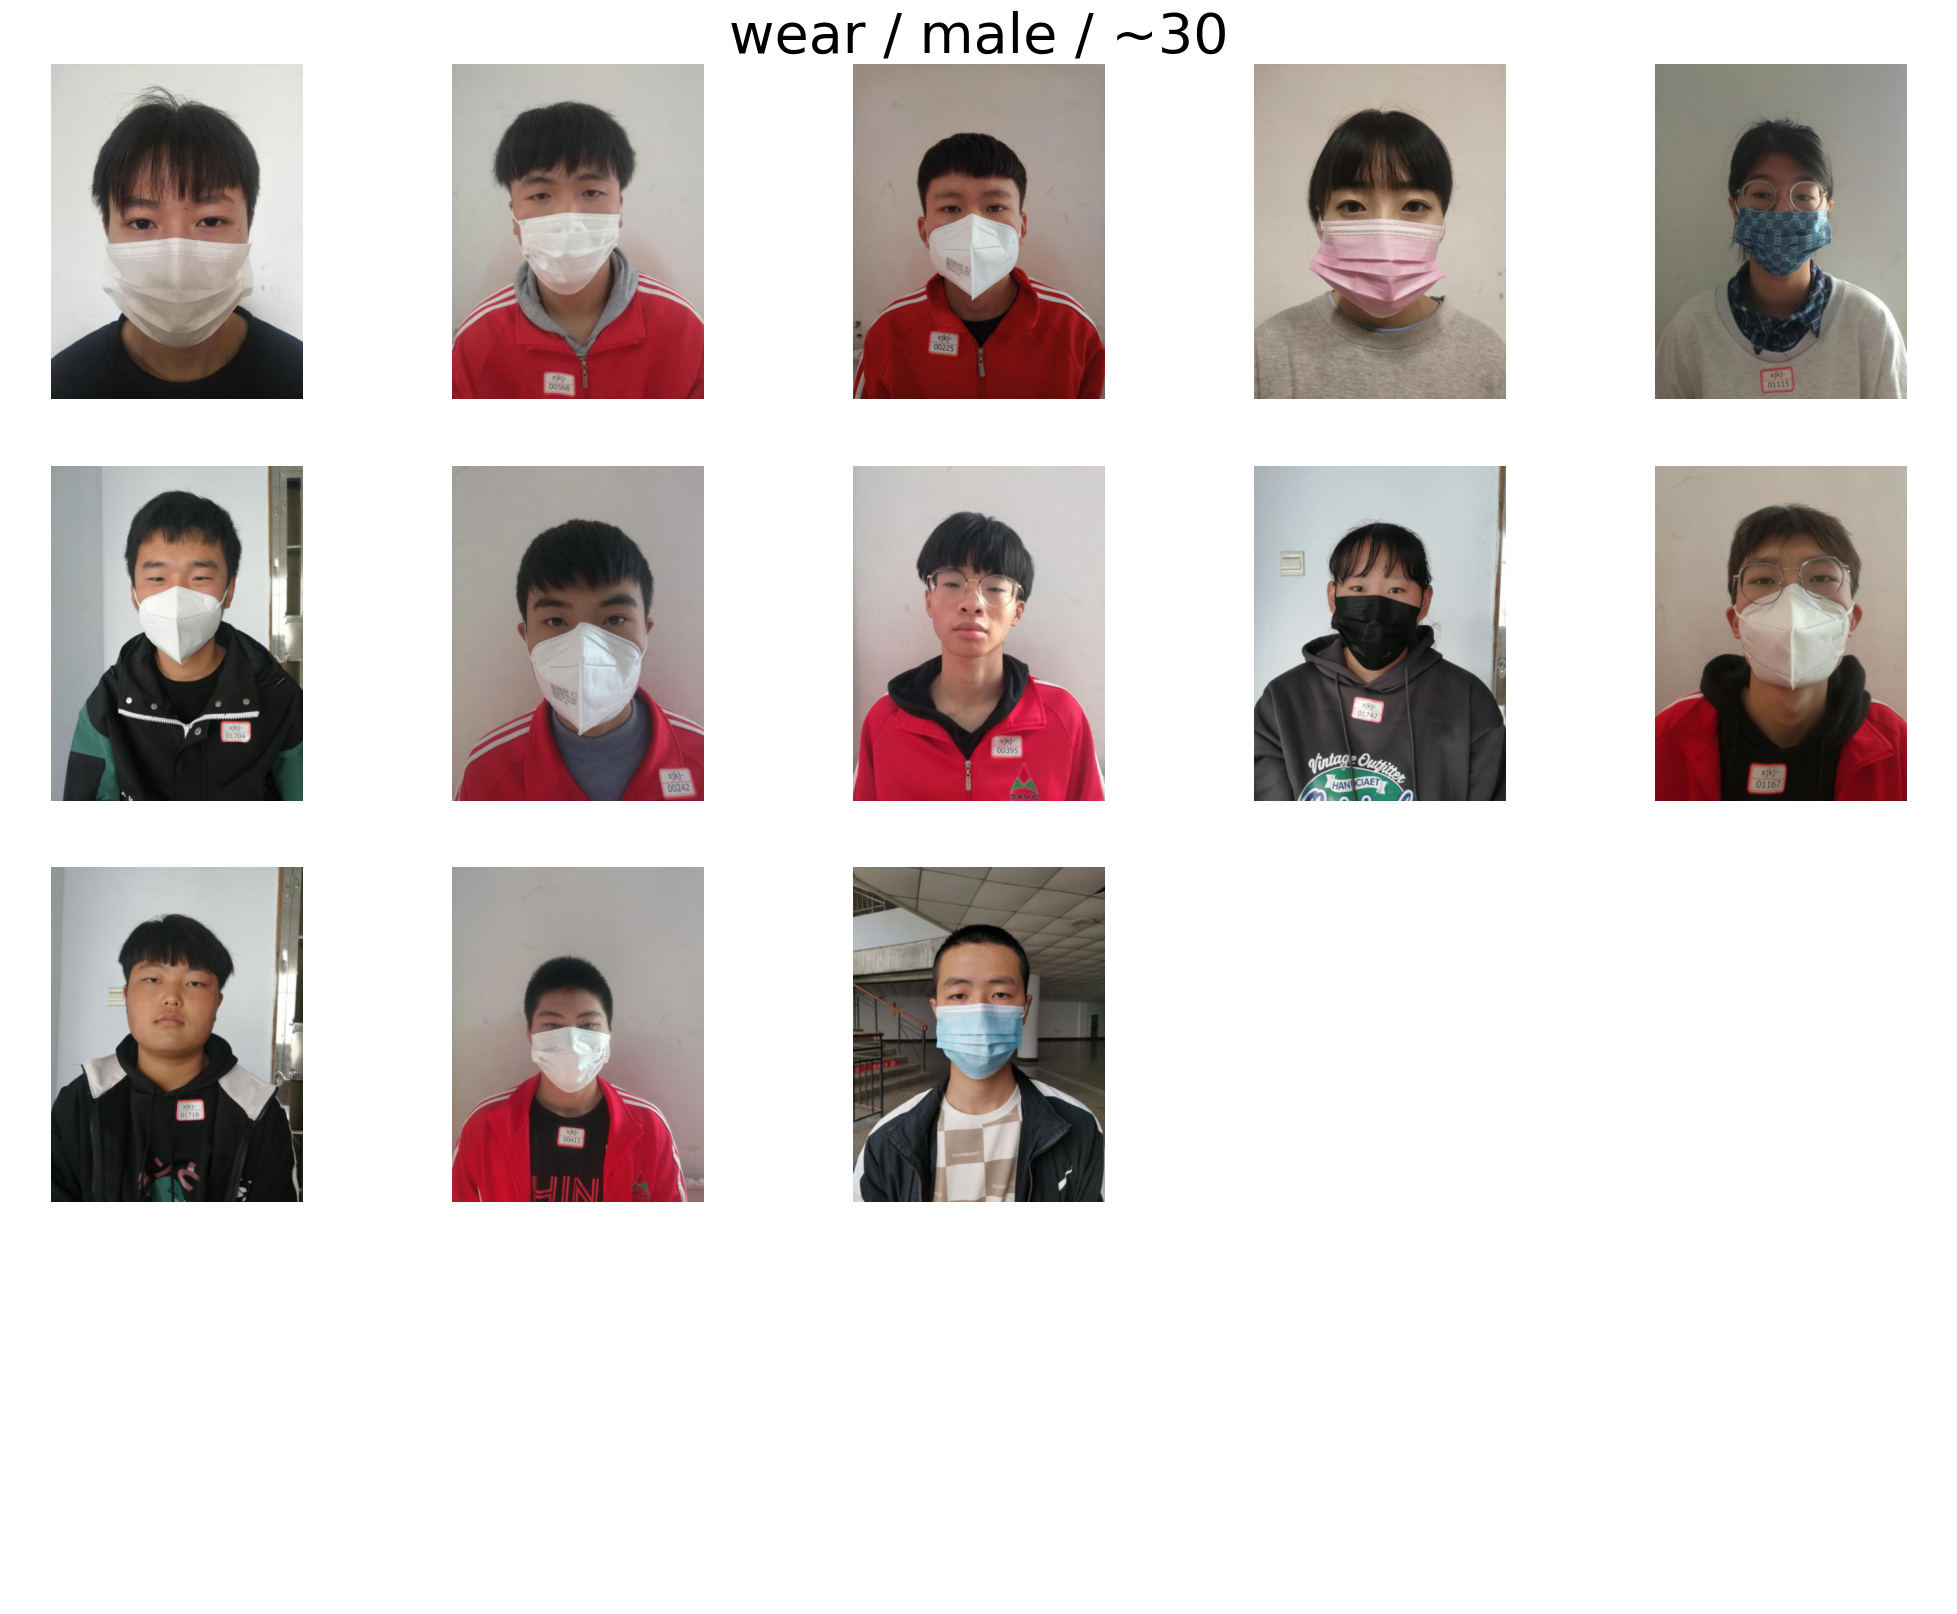

In [414]:
col = 4
row = num_imgs // (col-1)

fig = plt.figure(figsize=(25, row*5))
plt.title(check_stat(cl), fontsize=40)
plt.axis('off')
for i in range(num_imgs):
    ax = fig.add_subplot(row, col+1, i+1)
    plt.axis('off')
    ax.imshow(imgs[i])
plt.show()